In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [3]:
# 1. Import and Preprocess the Dataset
df = pd.read_csv('Housing.csv')

In [4]:
# Display first few rows
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [5]:
# Check for missing values
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [6]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_cols}")

Categorical columns: Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [7]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [8]:
# 2. Split Data into Train-Test Sets
X = df_encoded.drop('price', axis=1)  # Features
y = df_encoded['price']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 3. Fit a Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
# 4. Evaluate Model
y_pred = lr.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 970043.4039201636
Mean Squared Error (MSE): 1754318687330.6638
R² Score: 0.6529242642153184


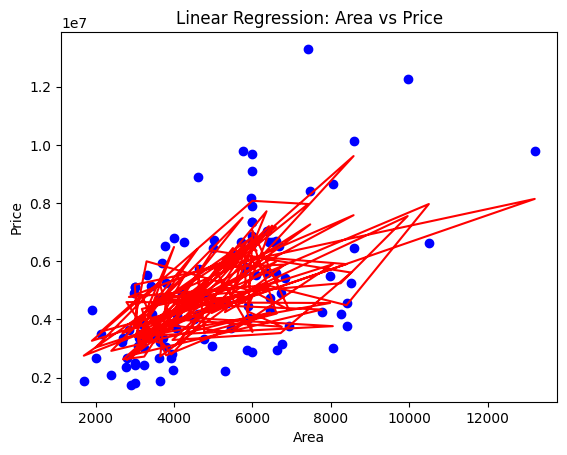

In [11]:
# 5. Plot Regression Line (for Simple Regression: if single feature)
# Select only 'area' feature for simple regression plotting
plt.scatter(X_test['area'], y_test, color='blue')
plt.plot(X_test['area'], y_pred, color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression: Area vs Price')
plt.show()

In [12]:
# Coefficients Interpretation
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, lr.coef_):
    print(f"{feature}: {coef}")

print(f"Intercept: {lr.intercept_}")


Model Coefficients:
area: 235.9688045413957
bedrooms: 76778.7016343784
bathrooms: 1094444.7861005957
stories: 407476.59498491115
parking: 224841.91327662673
mainroad_yes: 367919.9476795722
guestroom_yes: 231610.0371756495
basement_yes: 390251.17618109327
hotwaterheating_yes: 684649.8853387912
airconditioning_yes: 791426.7358431868
prefarea_yes: 629890.5653133605
furnishingstatus_semi-furnished: -126881.81758510851
furnishingstatus_unfurnished: -413645.062228222
Intercept: 260032.35760741215
